# 13.1 신경망 모델링 소개

2개의 집단으로 구성된 이변량 정규분포를 생성하여 원 소속 집단을 찾는 이항분류 분석 신경망 모델링 과정을 소개

# 13.2 데이터 준비 단계

### 데이터프레임 형태로 입력

In [ ]:
#1. 데이터프레임 형태로 데이터 입력
import pandas as pd
df = pd.DataFrame()
df['review'] = [
    "신차 정말 좋아요",
    "신차 속도감 너무 안좋아",
    "신차 디자인 연비 좋아요",
    "신차 엉터리로 개발했네요"
]

# 출력 정답
id_to_labels = {0: "부정", 1: "긍정"}
df['labels'] = [1, 0, 1, 0]
df

,review,labels
0,신차 정말 좋아요,1
1,신차 속도감 너무 안좋아,0
2,신차 디자인 연비 좋아요,1
3,신차 엉터리로 개발했네요,0


### 디렉토리 형태로 데이터 입력

In [ ]:
#2. 딕렉토리 단위로 분류분석 데이터 정리
!mkdir -p train/pos
!mkdir  train/neg
!echo '신차 정말 좋아요' >train/pos/a_1.txt
!echo '신차 디자인 연비 좋아요'>train/pos/a_2.txt
!echo '신차 속도감 너무 안좋아'>train/neg/b_1.txt
!echo '신차 엉터리로 개발했네요'>train/neg/b_2.txt
!mkdir -p test/pos
!mkdir  test/neg
!echo '속도감 별로예요' >test/neg/b_1.txt
!echo '연비가 좋아요'>test/pos/a_1.txt

In [ ]:
#3. Bachdataset으로 업로드
import tensorflow as tf
batch_size = 2
seed = 123

train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'train',
    labels='inferred',
    batch_size=batch_size,
    validation_split=0.25,
    subset='training',
    seed=seed)
val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'train',
    batch_size=batch_size,
    validation_split=0.25,
    subset='validation',
    seed=seed)

Found 4 files belonging to 2 classes.
Using 3 files for training.
Found 4 files belonging to 2 classes.
Using 1 files for validation.


In [ ]:
#4. tensor bytes data 출력해보기
for raw in train_ds:
  print(raw)
  s=raw[0].numpy()
  print(b''.join(s).decode('utf-8'))

(<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'\xec\x8b\xa0\xec\xb0\xa8 \xec\x86\x8d\xeb\x8f\x84\xea\xb0\x90 \xeb\x84\x88\xeb\xac\xb4 \xec\x95\x88\xec\xa2\x8b\xec\x95\x84\n',
       b'\xec\x8b\xa0\xec\xb0\xa8 \xec\x97\x89\xed\x84\xb0\xeb\xa6\xac\xeb\xa1\x9c \xea\xb0\x9c\xeb\xb0\x9c\xed\x96\x88\xeb\x84\xa4\xec\x9a\x94\n'],
      dtype=object)>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 0], dtype=int32)>)
신차 속도감 너무 안좋아
신차 엉터리로 개발했네요

(<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\xec\x8b\xa0\xec\xb0\xa8 \xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8 \xec\x97\xb0\xeb\xb9\x84 \xec\xa2\x8b\xec\x95\x84\xec\x9a\x94\n'],
      dtype=object)>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>)
신차 디자인 연비 좋아요



In [ ]:
# 시험용 데이터 업로드
test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'test',
    batch_size=batch_size)

Found 2 files belonging to 2 classes.


In [ ]:
print("Label 0 corresponds to", train_ds.class_names[0])
print("Label 1 corresponds to", train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


## 데이터 탐색

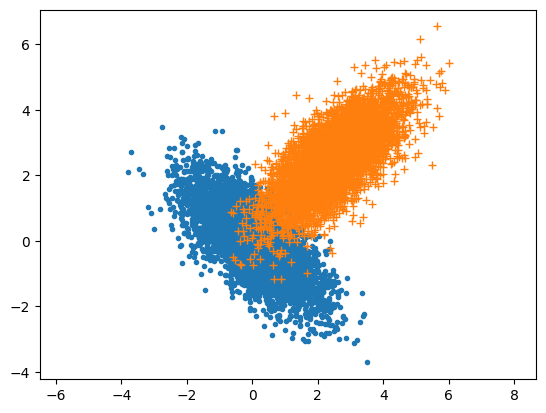

In [ ]:
#5. 2개의 이변량 정규분포로부터 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

mean1 = [0, 0]
cov1 = [[1, -0.7], [-0.7, 1]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 5000).T
mean2 = [2.5, 2.5]
cov2 = [[1, 0.7], [0.7, 1]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 5000).T

plt.plot(x1, y1, '.')
plt.plot(x2, y2, '+' )
plt.axis('equal')
plt.show()


In [ ]:
# 6. 두개의 class로 구분되는 데이터프레임으로 정리
import pandas as pd
df1 = pd.DataFrame({'x':x1, 'y':y1, 'class':0})
df2 = pd.DataFrame({'x':x2, 'y':y2, 'class':1})
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df

,x,y,class
0,-0.210294,0.090600,0
1,0.241695,0.678747,0
2,-2.464370,1.998694,0
3,-0.456345,-0.244077,0
4,-1.103514,0.670118,0
...,...,...,...
9995,4.045767,3.349394,1
9996,2.136385,2.837349,1
9997,1.161094,0.926522,1
9998,2.454566,2.295098,1


class
0    5000
1    5000
Name: count, dtype: int64


<Axes: >

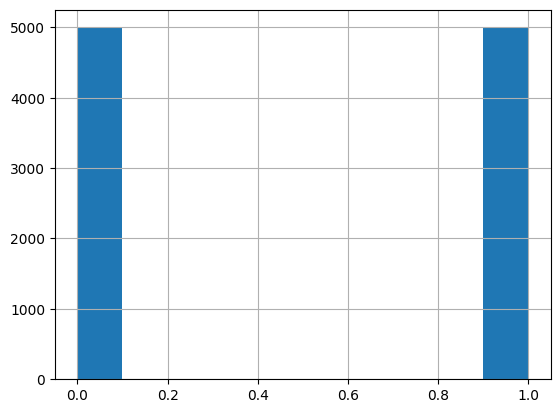

In [ ]:
#7 class별 빈도수
print(df['class'].value_counts())
df['class'].hist()

## 데이터 분리

In [ ]:
# 8. 데이터를  20%씩 test 데이터와 val 데이터로 분리
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(df[['x', 'y']], df['class'], test_size=0.2, random_state=1234)
train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(train_inputs, train_labels, test_size=0.2, random_state=1234)
train_inputs.shape, train_labels.shape

((6400, 2), (6400,))

In [ ]:
print(valid_inputs.shape, valid_labels.shape)
print(test_inputs.shape, test_labels.shape)

(1600, 2) (1600,)
(2000, 2) (2000,)


# 13.3 모델링 및 학습 단계

In [ ]:
# 9-1. 모델링 : 다층의 layer를 쌓아서 모델링, 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(train_inputs.shape[-1],)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#9-2 모델 컴파일과 저장설정, 요약
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
save_weights = tf.keras.callbacks.ModelCheckpoint("model.hdf5",
                                                  monitor='val_accuracy',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode="max",
                                                  save_freq="epoch",
                                                  save_weights_only=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


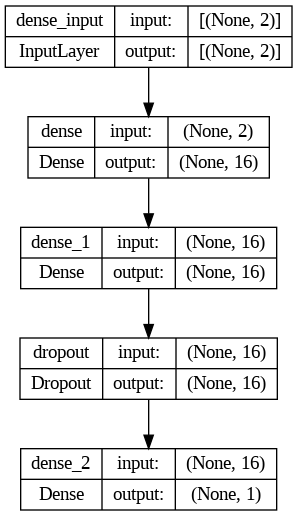

In [ ]:
# 모델링 요약
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
#10. 모델 저장 설정과 학습
history = model.fit(train_inputs, train_labels,
                    validation_data=(valid_inputs, valid_labels) ,
                    epochs=40,
                    batch_size=256,
                    callbacks=[save_weights])

Epoch 1/40
 1/25 [>.............................] - ETA: 21s - loss: 0.6979 - accuracy: 0.5273
Epoch 1: val_accuracy improved from -inf to 0.61313, saving model to model.hdf5
25/25 [==============================] - 1s 12ms/step - loss: 0.6540 - accuracy: 0.5928 - val_loss: 0.5908 - val_accuracy: 0.6131
Epoch 2/40
 1/25 [>.............................] - ETA: 0s - loss: 0.6020 - accuracy: 0.6562
Epoch 2: val_accuracy improved from 0.61313 to 0.76250, saving model to model.hdf5
25/25 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.7034 - val_loss: 0.5115 - val_accuracy: 0.7625
Epoch 3/40
21/25 [========================>.....] - ETA: 0s - loss: 0.5110 - accuracy: 0.7961
Epoch 3: val_accuracy improved from 0.76250 to 0.85625, saving model to model.hdf5
25/25 [==============================] - 0s 5ms/step - loss: 0.5018 - accuracy: 0.8078 - val_loss: 0.4336 - val_accuracy: 0.8562
Epoch 4/40
 1/25 [>.............................] - ETA: 0s - loss: 0.4474 - accura

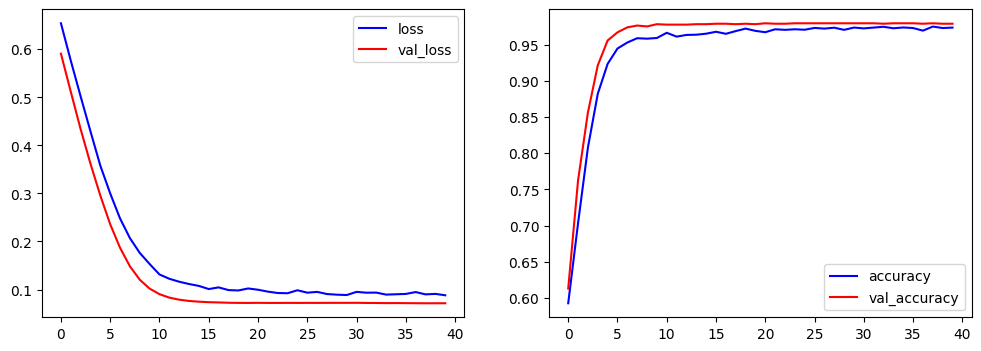

In [ ]:
# 12. 학습결과 손실함수와 정확도 확인
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.legend()
plt.show()

# 13.4 평가 및 배포 단계

In [ ]:
#11. 훈련된 이미지 분류기는 이 데이터셋에서 거의 97.5%의 정확도를 달성
loss, accuracy = model.evaluate(test_inputs,  test_labels, verbose=2)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

63/63 - 0s - loss: 0.0508 - accuracy: 0.9830 - 126ms/epoch - 2ms/step
Loss:  0.050766877830028534
Accuracy:  0.9829999804496765


63/63 [==============================] - 0s 2ms/step


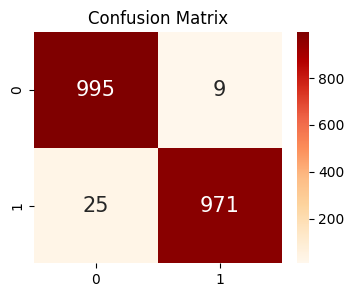

In [ ]:
#13. confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred_class=model.predict(test_inputs).round()

c_mat = confusion_matrix(y_pred = pred_class, y_true = test_labels)
plt.figure(figsize=(4, 3))
sns.heatmap(c_mat, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#14. 정확도 측정 지표
pd.options.display.float_format = '{:.2f}'.format
tp = c_mat[1, 1]
tn = c_mat[0, 0]
fp = c_mat[0, 1]
fn = c_mat[1, 0]
accuracy = (tp + tn) / max((tp + tn + fp + fn), 1)
precision = (tp) / max((tp + fp), 1)
recall = (tp) / max((tp + fn), 1)
f1 = 2 * (precision * recall) / max((precision + recall), 0.1)

table = pd.DataFrame([accuracy, precision, recall,f1]).T
table.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1']
table

,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1
0,0.98,0.99,0.97,0.98


In [ ]:
#15. 배포 : 새로운 데이터에 대하여 어느 집단에 속할 것인지를 추론하기 위해 저장된 모델 호출 및 처리
model.load_weights('model.hdf5')

new_xy = [[-1, 0.3], [1.1, 1.2], [5,5]]
pred = model.predict( new_xy)
print(np.round(pred).astype(int))

1/1 [==============================] - 0s 110ms/step
[[0]
 [1]
 [1]]
